In [64]:
import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import datetime as dt
import numpy as np
warnings.filterwarnings("ignore")
csv_path = "Cleaned_Crime_Data.csv"
crime_data = pd.read_csv(csv_path)

In [48]:
crime_subset = crime_data[(crime_data["Crime Code Description"] == "CRIMINAL HOMICIDE") |(crime_data["Crime Code Description"] == "ARSON") |(crime_data["Crime Code Description"] == "KIDNAPPING")|(crime_data["Crime Code Description"] == "THROWING OBJECT AT MOVING VEHICLE") |(crime_data["Crime Code Description"] == "PICKPOCKET")]
crime_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2779 entries, 14 to 488034
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2779 non-null   int64  
 1   Date Occurred           2779 non-null   object 
 2   Time Occurred           2779 non-null   int64  
 3   Area Name               2779 non-null   object 
 4   Reporting District      2779 non-null   int64  
 5   Crime Code Description  2779 non-null   object 
 6   Victim Age              2779 non-null   float64
 7   Victim Sex              2779 non-null   object 
 8   Victim Descent          2779 non-null   object 
 9   Premise Description     2779 non-null   object 
 10  Location                2779 non-null   object 
 11  Month                   2779 non-null   int64  
 12  Day                     2779 non-null   int64  
 13  Year                    2779 non-null   int64  
 14  Lat                     2779 non-null

In [71]:
crime_subset["Datetime"] = pd.to_datetime(crime_subset["Date Occurred"])
crime_subset["Datetime"] = crime_subset["Datetime"].astype("int64")
crime_subset.head()

,Unnamed: 0,Date Occurred,Time Occurred,Area Name,Reporting District,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Location,Month,Day,Year,Lat,Lon,Datetime
14,983216,10/03/2015,1300,Central,185,PICKPOCKET,19.0,F,H,SIDEWALK,"(34.0383, -118.254)",10,3,2015,34.0383,-118.2540,2015-10-03
58,995317,01/27/2015,1715,Central,158,KIDNAPPING,29.0,F,W,SIDEWALK,"(34.0395, -118.2405)",1,27,2015,34.0395,-118.2405,2015-01-27
240,995524,05/31/2015,240,Central,164,PICKPOCKET,28.0,F,H,BAR/COCKTAIL/NIGHTCLUB,"(34.046, -118.2509)",5,31,2015,34.0460,-118.2509,2015-05-31
255,995541,01/18/2015,1300,Central,181,PICKPOCKET,49.0,M,W,OTHER BUSINESS,"(34.0431, -118.2692)",1,18,2015,34.0431,-118.2692,2015-01-18
405,995716,09/28/2015,2230,Central,111,KIDNAPPING,23.0,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","(34.0591, -118.2412)",9,28,2015,34.0591,-118.2412,2015-09-28


14       2015-10-03
58       2015-01-27
240      2015-05-31
255      2015-01-18
405      2015-09-28
            ...    
486604   2017-08-23
486885   2017-08-17
487448   2017-09-02
487538   2017-01-12
488034   2017-09-08
Name: Datetime, Length: 2779, dtype: datetime64[ns]

In [46]:
plot = crime_subset.hvplot.points("Lon","Lat",geo = True, tiles = "OSM", frame_height = 500,frame_width = 700,
                                  color = "Crime Code Description", hover_cols=["Victim Age", "Victim Sex"])
plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (Crime Code Description,Victim Age,Victim Sex)

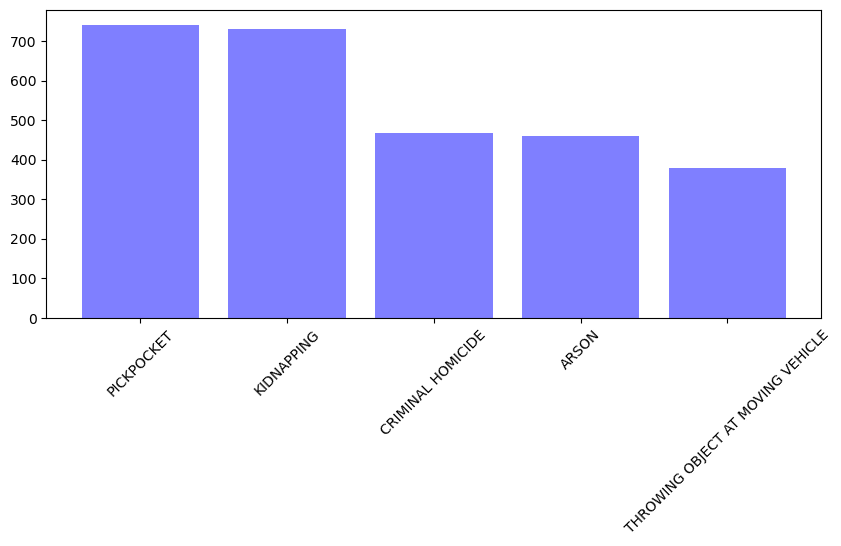

In [26]:
crimes_per_type = crime_subset["Crime Code Description"].value_counts()
crimes = crime_subset["Crime Code Description"].unique()
crimes_per_area = crime_subset["Area Name"].value_counts()
plt.figure(figsize=(10,4))
plt.bar(crimes,crimes_per_type,color = "blue", alpha = .5)
#plt.bar(crimes,crimes_per_area, color = "orange")
plt.xticks(crimes, rotation = 45)
plt.show()

In [35]:
pd.crosstab(index = crime_subset["Area Name"], columns = crime_subset["Crime Code Description"])

Crime Code Description,ARSON,CRIMINAL HOMICIDE,KIDNAPPING,PICKPOCKET,THROWING OBJECT AT MOVING VEHICLE
Area Name,,,,,
77th Street,105,130,74,11,38
Central,34,35,25,79,21
Devonshire,16,12,12,12,28
Foothill,31,27,20,3,23
Harbor,40,42,8,8,30
Hollenbeck,25,36,23,1,16
Hollywood,17,17,13,67,17
Mission,40,43,24,5,19
N Hollywood,26,23,23,15,28


Text(0, 0.5, '')

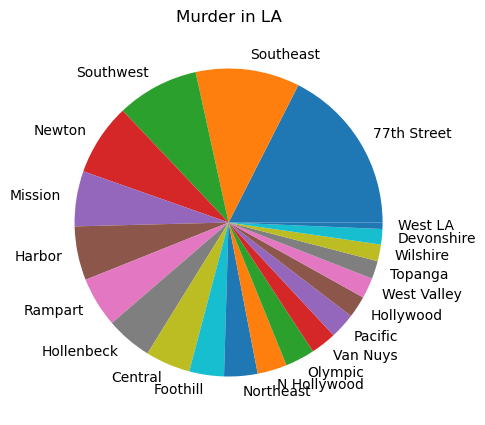

In [74]:
murder = crime_subset[crime_subset["Crime Code Description"] == "CRIMINAL HOMICIDE"]
murder_areas = murder["Area Name"].value_counts()
murderplot = murder_areas.plot.pie(figsize = (5,5),title = "Murder in LA")
murderplot.axes.set_ylabel('')

Text(0, 0.5, '')

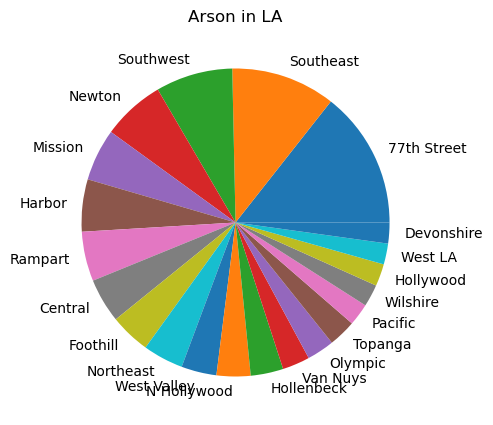

In [75]:
arson = crime_subset[crime_subset["Crime Code Description"] == "ARSON"]
arson_areas = arson["Area Name"].value_counts()
arsonplot = arson_areas.plot.pie(figsize = (5,5),title = "Arson in LA")
arsonplot.axes.set_ylabel('')

Text(0, 0.5, '')

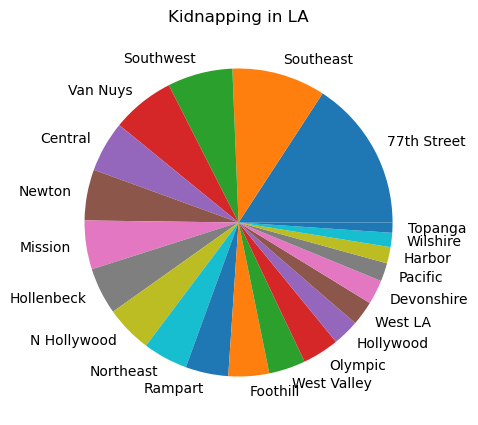

In [77]:
kidnap = crime_subset[crime_subset["Crime Code Description"] == "KIDNAPPING"]
kidnap_areas = kidnap["Area Name"].value_counts()
kidplot = kidnap_areas.plot.pie(figsize = (5,5), title = "Kidnapping in LA" )
kidplot.axes.set_ylabel('')



Text(0, 0.5, '')

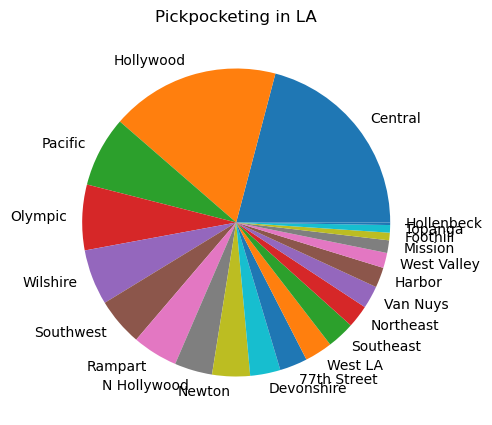

In [78]:
pick = crime_subset[crime_subset["Crime Code Description"] == "PICKPOCKET"]
pick_areas = pick["Area Name"].value_counts()
pickplot = pick_areas.plot.pie(figsize = (5,5), title = "Pickpocketing in LA")
pickplot.axes.set_ylabel('')



Text(0, 0.5, '')

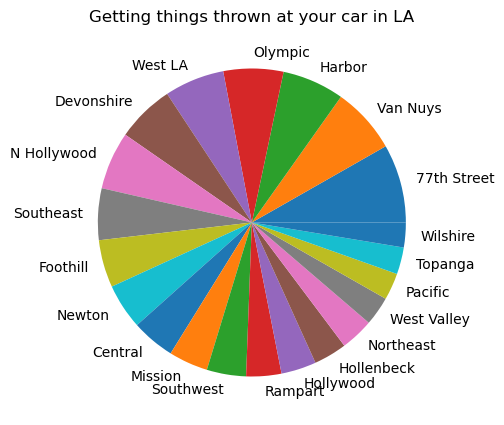

In [79]:
throwing = crime_subset[crime_subset["Crime Code Description"] == "THROWING OBJECT AT MOVING VEHICLE"]
throwing_areas = throwing["Area Name"].value_counts()
throwplot = throwing_areas.plot.pie(figsize = (5,5),title = "Getting things thrown at your car in LA")
throwplot.axes.set_ylabel('')

# What times of the day does crime happen?

In [41]:
crime_subset["Time Occurred"]

14        1300
58        1715
240        240
255       1300
405       2230
          ... 
486604    1946
486885    2027
487448     800
487538    1900
488034     211
Name: Time Occurred, Length: 2779, dtype: int64

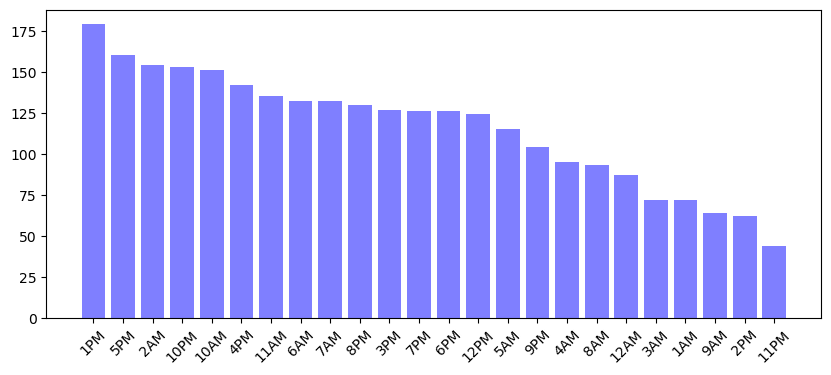

In [88]:
bins = [0, 99, 199, 299, 399, 499, 599, 699, 799, 899,999,1099,1199,1299,1399,1499,1599,1699,1799,1899,1999,
       2099,2199,2299,2399]

# Create labels for these bins
group_labels = ["12AM", "1AM", "2AM", "3AM", "4AM", "5AM",
                "6AM", "7AM", "8AM", "9AM","10AM","11AM","12PM",
                "1PM","2PM","3PM","4PM","5PM","6PM","7PM","8PM","9PM","10PM","11PM"]

crime_subset["Time of Day"] = pd.cut(crime_subset["Time Occurred"], bins, labels=group_labels)
crimes_times = crime_subset["Time of Day"].value_counts()
times = crime_subset["Time of Day"].unique()
plt.figure(figsize=(10,4))
plt.bar(times,crimes_times,color = "blue", alpha = .5)
#plt.bar(crimes,crimes_per_area, color = "orange")
plt.xticks(times, rotation = 45)
plt.show()